In [43]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [44]:
datas=pd.read_csv('C:\\Users\\Abhiyansh\\Finalproject\\data.csv')
datas.describe()
datas.query('Dangerous!="Yes" and Dangerous!="No"')
datas.dropna(inplace=True)
datas[datas.duplicated()]
datas.drop_duplicates(inplace=True)
datas['AnimalName']=datas.AnimalName.str.capitalize()
datas.AnimalName.value_counts()

AnimalName
Buffaloes            128
Sheep                109
Pig                   63
Fowl                  62
Elephant              59
Duck                  57
Birds                 37
Cat                   36
Donkey                35
Dog                   34
Monkey                28
Goat                  26
Deer                  26
Cattle                22
Hamster               18
Lion                  16
Horse                 15
Chicken               13
Rabbit                11
Fox                    7
Tiger                  6
Other birds            6
Turtle                 4
Cow                    3
Pigs                   3
Goats                  2
Mules                  1
Moos                   1
Hyaenas                1
Wolves                 1
Dogs                   1
Fox                    1
Reindeer               1
Snake                  1
White-tailed deer      1
Sika deer              1
Black-tailed deer      1
Mule deer              1
Wapiti                 1
Elk           

In [45]:
datas['AnimalName'].replace({'White-tailed deer':'Deer','Black-tailed deer':'Deer','Wapiti':'Deer','Mules':'Horse','Pigs':'Pig','Other birds':'Birds','Goats':'Goat','Dogs':'Dog','FoX':'Fox','Reindeer':'Deer','Sika deer':'Deer','Elk':'Deer','Mule deer':'Deer'},inplace=True)

Type of AnimalName column is object
Type of symptoms1 column is object
Type of symptoms2 column is object
Type of symptoms3 column is object
Type of symptoms4 column is object
Type of symptoms5 column is object
Type of Dangerous column is object


<Axes: xlabel='AnimalName', ylabel='count'>

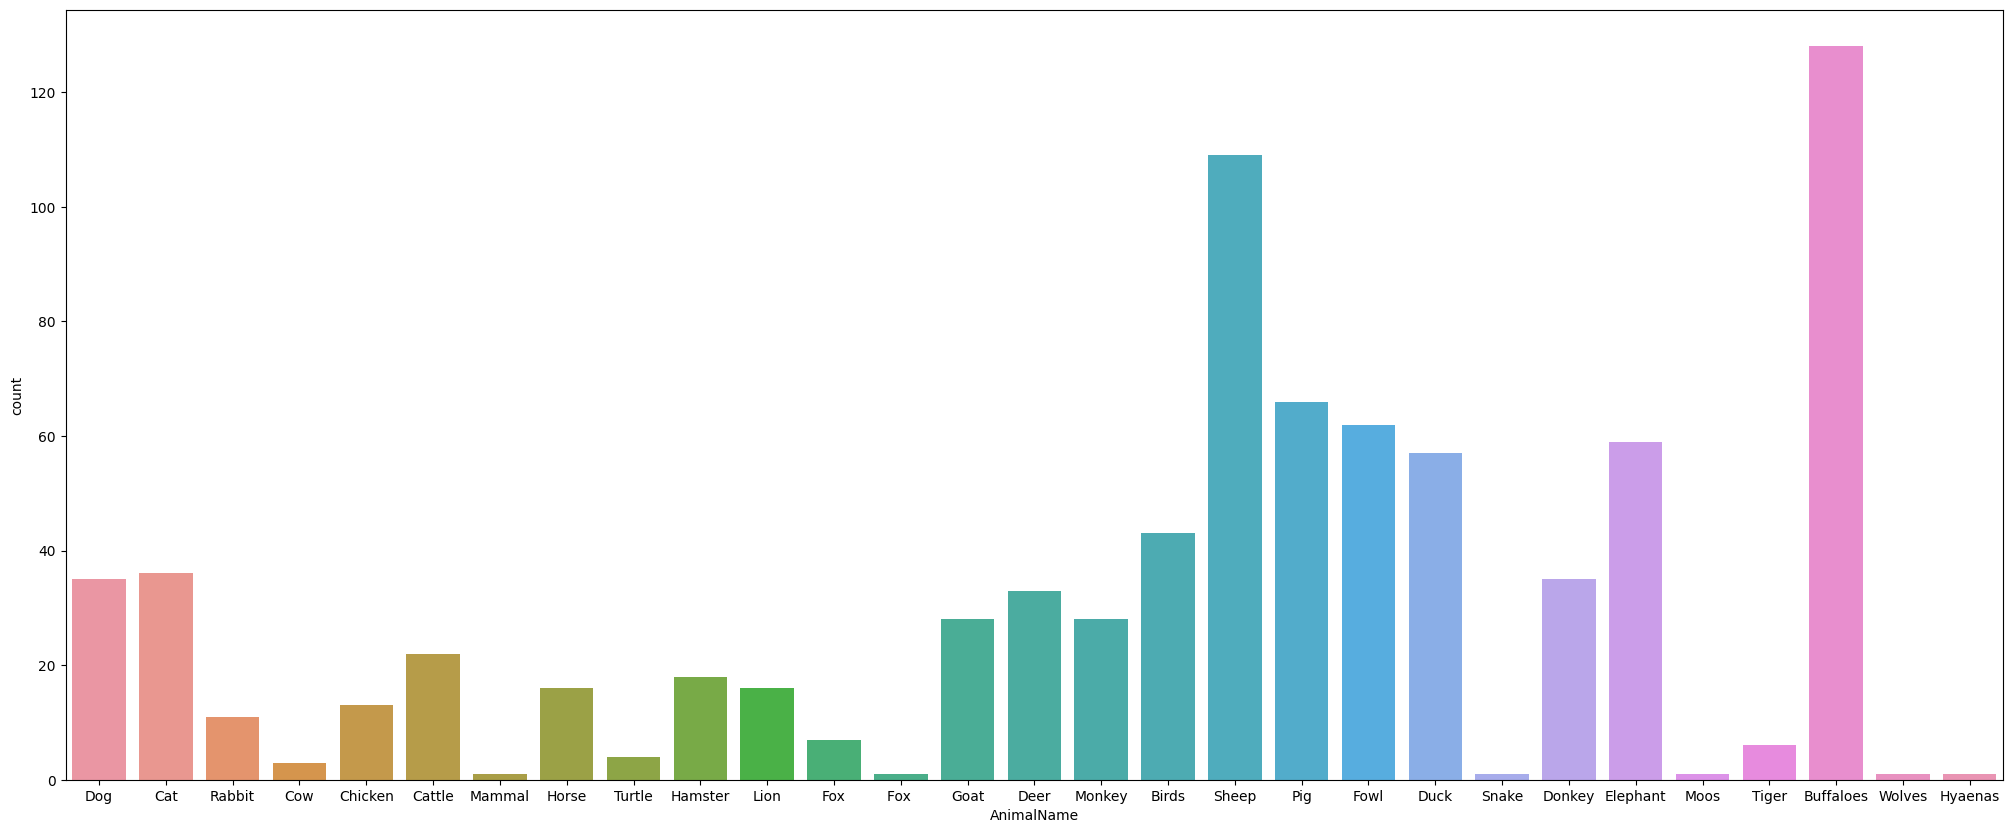

In [46]:
def pie(col):
    data_counts =datas[col].value_counts()
    plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.set_title(f'Pie plot for {col}')
    plt.show()
for col in datas.columns: 
    print(f'Type of {col} column is {datas[col].dtype}')
plt.figure(figsize=(25,10))
sns.countplot( data=datas,x=datas.AnimalName)

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
le=LabelEncoder()

In [48]:
for col in datas.columns:
    if(datas[col].dtype=='object'):
        datas[col]=le.fit_transform(datas[col])

In [49]:
print(datas)

     AnimalName  symptoms1  symptoms2  symptoms3  symptoms4  symptoms5   
0             7         63         30        179        181         32  \
1             7         63         30         31        164        113   
2             7         63         30         31        172          8   
3             7         63         33         31         87        142   
4             7         63         30         31         87         21   
..          ...        ...        ...        ...        ...        ...   
866           1         63         33        115         53        160   
867           1         63         94         88         87         78   
868           1         97         89        179        107         82   
869           1         77         25        179         27        159   
870           1         75         83        179         87        111   

     Dangerous  
0            1  
1            1  
2            1  
3            1  
4            1  
..       

In [50]:
X=datas.drop('Dangerous',axis=1)
y=datas['Dangerous']
X_train ,X_test ,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [51]:
model_svm=SVC(kernel='linear',random_state=0)
model_svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [52]:
predicted_y=model_svm.predict(X_test)
accuracy_score_svm=accuracy_score(y_test,predicted_y)
print(predicted_y)
f1_score_svm=f1_score(y_test,predicted_y)
precision_score_svm=precision_score(y_test,predicted_y)
recall_score_svm=recall_score(y_test,predicted_y)
print("Accuracy of SVM model: ", accuracy_score_svm)
print("f1 score of SVM model: ", f1_score_svm)
print("precision score of SVM model: ", precision_score_svm)
print("recall score of SVM model: ", recall_score_svm)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy of SVM model:  0.981042654028436
f1 score of SVM model:  0.9904306220095694
precision score of SVM model:  0.981042654028436
recall score of SVM model:  1.0


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [54]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(y_pred)
accuracy_score_knn=accuracy_score(y_test,y_pred)
f1_score_knn=f1_score(y_test,y_pred)
precision_score_knn=precision_score(y_test,y_pred)
recall_score_knn=recall_score(y_test,y_pred)
print("Accuracy of SVM model: ", accuracy_score_knn)
print("f1 score of SVM model: ", f1_score_knn)
print("precision score of SVM model: ", precision_score_knn)
print("recall score of SVM model: ", recall_score_knn)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy of SVM model:  0.976303317535545
f1 score of SVM model:  0.988009592326139
precision score of SVM model:  0.9809523809523809
recall score of SVM model:  0.9951690821256038


In [55]:
knn1=KNeighborsClassifier()
parameters={'n_neighbors':[3,5,7,9],'metric':['euclidean','manhattan','chebyshev']}
grid_search=GridSearchCV(knn1,parameters,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9]},
             scoring='accuracy')

In [56]:
best_clf=grid_search.best_estimator_
y_pred_knn1=best_clf.predict(X_test)
print(y_pred_knn1)
accuracy_score_knn1=accuracy_score(y_test,y_pred_knn1)
f1_score_knn1=f1_score(y_test,y_pred_knn1)
precision_score_knn1=precision_score(y_test,y_pred_knn1)
recall_score_knn1=recall_score(y_test,y_pred_knn1)
print("Accuracy of knn model: ", accuracy_score_knn1)
print("f1 score of knn model: ", f1_score_knn1)
print("precision score of knn model: ", precision_score_knn1)
print("recall score of knn model: ", recall_score_knn1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy of knn model:  0.981042654028436
f1 score of knn model:  0.9904306220095694
precision score of knn model:  0.981042654028436
recall score of knn model:  1.0


In [57]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import OneHotEncoder  
# X_forest=datas.drop('Dangerous',axis=1)
# Y_forest=datas['Dangerous']
# X_train_forest,X_test_forest,y_train_forest,y_test_forest=train_test_split(X,y,test_size=0.25,random_state=0)
# forest_clf=RandomForestClassifier()
# parameters={'n_estimators':[4,6,8,10,12],'max_depth':[2,4,6,8,10],'min_samples_split':[2,3,4,5]}
# grid_forest_clf=GridSearchCV(forest_clf,parameters,cv=6,n_jobs=-1)
# grid_forest_clf.fit(X_train_forest,y_train_forest)

In [58]:
# best_forest_clf=grid_forest_clf.best_estimator_
# y_pred_forest=best_forest_clf.predict(X_test_forest)
# print(y_pred_forest)
# print(grid_forest_clf.best_params_)
# accuracy_score_forest=accuracy_score(y_test_forest,y_pred_forest)
# f1_score_forest=f1_score(y_test_forest,y_pred_forest)
# precision_score_forest=precision_score(y_test_forest,y_pred_forest)
# recall_score_forest=recall_score(y_test_forest,y_pred_forest)
# print("Accuracy of SVM model: ", accuracy_score_forest)
# print("f1 score of SVM model: ", f1_score_forest)
# print("precision score of SVM model: ", precision_score_forest)
# print("recall score of SVM model: ", recall_score_forest)

In [59]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Assuming 'datas' is your DataFrame
X_forest = datas.drop('Dangerous', axis=1)  # Features
Y_forest = datas['Dangerous']               # Target

# Split the data into training and test sets
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(
    X_forest, Y_forest, test_size=0.25, random_state=0
)

# OneHotEncoder to handle categorical features
encoder = OneHotEncoder(handle_unknown='ignore')  # Ignore unseen categories in test data

# Fit encoder on training data and transform both train and test sets
X_train_encoded = encoder.fit_transform(X_train_forest)
X_test_encoded = encoder.transform(X_test_forest)

# Initialize the RandomForestClassifier
forest_clf = RandomForestClassifier()

# Define the hyperparameter grid for GridSearchCV
parameters = {
    'n_estimators': [4, 6, 8, 10, 12],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 3, 4, 5]
}

# Use GridSearchCV to find the best model
grid_forest_clf = GridSearchCV(forest_clf, parameters, cv=6, n_jobs=-1)
grid_forest_clf.fit(X_train_encoded, y_train_forest)

# Get the best model from GridSearchCV
best_forest_clf = grid_forest_clf.best_estimator_

# Make predictions on the test set
y_pred_forest = best_forest_clf.predict(X_test_encoded)

# Print the best parameters from GridSearchCV
print("Best Parameters for RandomForest:", grid_forest_clf.best_params_)

# Evaluate the model using accuracy, F1-score, precision, and recall
accuracy_score_forest = accuracy_score(y_test_forest, y_pred_forest)
f1_score_forest = f1_score(y_test_forest, y_pred_forest)
precision_score_forest = precision_score(y_test_forest, y_pred_forest)
recall_score_forest = recall_score(y_test_forest, y_pred_forest)

# Print evaluation metrics
print("Accuracy of RandomForest model: ", accuracy_score_forest)
print("F1 score of RandomForest model: ", f1_score_forest)
print("Precision score of RandomForest model: ", precision_score_forest)
print("Recall score of RandomForest model: ", recall_score_forest)


Best Parameters for RandomForest: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 10}
Accuracy of RandomForest model:  0.981042654028436
F1 score of RandomForest model:  0.9904306220095694
Precision score of RandomForest model:  0.981042654028436
Recall score of RandomForest model:  1.0


In [60]:
print("X_train_encoded shape:", X_train_encoded.shape)
print("X_test_encoded shape:", X_test_encoded.shape)


X_train_encoded shape: (630, 1066)
X_test_encoded shape: (211, 1066)


In [61]:
import pickle
# Save the model and encoder
with open('model.pkl', 'wb') as f:
    pickle.dump(grid_forest_clf.best_estimator_, f)
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


In [62]:
import pickle
from sklearn.preprocessing import OneHotEncoder

# Load the model
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Fix the encoder to handle unknown categories
encoder = OneHotEncoder(handle_unknown="ignore")

# Fit the encoder on training data categories (X_train)
encoder.fit(X_train)  

# Transform the test input
X_test = [['Monkey','Fever','Hepatitis','Skin rashes','Weight loss','Pain']]
X_test_encoded = encoder.transform(X_test).toarray()

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test_encoded)
print("Predictions:", predictions)


Predictions: [1]


In [63]:
import pickle
from sklearn.preprocessing import OneHotEncoder

# Load the model
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

prediction=0
# Fix the encoder to handle unknown categories
encoder = OneHotEncoder(handle_unknown="ignore")

# Fit the encoder on training data categories (X_train)
encoder.fit(X_train)  

# Transform the test input
X_test = [['Monkey','Fever','Hepatitis','Skin rashes','Weight loss','Pain']]
X_test_encoded = encoder.transform(X_test).toarray()

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test_encoded)
print("Predictions:", prediction)

Predictions: 0
